### Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
path = "Dataset"  
dataset = path + '/mental_health.sqlite'
con = sql.connect(dataset)

### DATA VALIDATION

In [4]:
query = """
    SELECT * FROM Survey;
"""

df = pd.read_sql(query, con)
df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [5]:
query = """
    SELECT * FROM Answer order by questionid;
"""

df = pd.read_sql(query, con)
df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Sometimes,2016,2689,118
236894,Sometimes,2016,2690,118
236895,Sometimes,2016,2691,118
236896,Sometimes,2016,2692,118


In [6]:
query = """
    SELECT * FROM Question;
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [7]:
query = """
    WITH CTE AS (
    SELECT questiontext, questionid,
    lag (questionid,1) OVER (ORDER BY questionid) AS PrevQuestion
    FROM Question
    )
    SELECT * FROM CTE 
    WHERE questionid-PrevQuestion !=1;
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid,PrevQuestion
0,"If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",48,34


In [8]:
query = """
    SELECT DISTINCT questiontext FROM Question;
"""

df = pd.read_sql(query, con)
df

,questiontext
0,What is your age?
1,What is your gender?
2,What country do you live in?
3,"If you live in the United States, which state or territory do you live in?"
4,Are you self-employed?
5,Do you have a family history of mental illness?
6,Have you ever sought treatment for a mental health disorder from a mental health professional?
7,How many employees does your company or organization have?
8,Is your employer primarily a tech company/organization?
9,Does your employer provide mental health benefits as part of healthcare coverage?


In [9]:
query = """
    SELECT SurveyID FROM Survey 
    WHERE SurveyID IN (SELECT DISTINCT SurveyID FROM Answer);
"""

df = pd.read_sql(query, con)
df

,SurveyID
0,2014
1,2016
2,2017
3,2018
4,2019


In [10]:
query = """
    SELECT questionid FROM Question
    WHERE questionid IN (SELECT DISTINCT questionid FROM Answer);
"""

df = pd.read_sql(query, con)
df

,questionid
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [11]:
query = """
    SELECT count(DISTINCT UserID), min(DISTINCT UserID), MAX(DISTINCT UserID)
    FROM Answer;
"""

df = pd.read_sql(query, con)
df

,count(DISTINCT UserID),min(DISTINCT UserID),MAX(DISTINCT UserID)
0,4218,1,4218


In [12]:
query = """
    WITH CTE AS (
    SELECT A.*, Q.questiontext,
    row_number() OVER(PARTITION BY A.questionid) AS RN
    FROM Answer A
    LEFT JOIN Question Q ON A.questionid = Q.questionid
    )
    SELECT * FROM CTE WHERE RN<=10 OR RN>=4210;
"""

df = pd.read_sql(query, con)
df

,AnswerText,SurveyID,UserID,QuestionID,questiontext,RN
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,2
2,32,2014,3,1,What is your age?,3
3,31,2014,4,1,What is your age?,4
4,31,2014,5,1,What is your age?,5
5,33,2014,6,1,What is your age?,6
6,35,2014,7,1,What is your age?,7
7,39,2014,8,1,What is your age?,8
8,42,2014,9,1,What is your age?,9
9,23,2014,10,1,What is your age?,10


In [13]:
query = """
    SELECT questionid, count(DISTINCT AnswerText) AS UniqueAnswers
    FROM Answer
    GROUP BY questionid
    ORDER BY UniqueAnswers DESC;
"""

df = pd.read_sql(query, con)
df

,QuestionID,UniqueAnswers
0,86,1020
1,63,457
2,61,449
3,59,353
4,82,337
5,73,306
6,87,287
7,75,269
8,71,229
9,103,160


In [46]:
query = """
    SELECT DISTINCT AnswerText FROM Answer 
    WHERE questionid IN (117);
"""

df = pd.read_sql(query, con)
df

,AnswerText
0,Back-end Developer
1,Front-end Developer
2,Supervisor/Team Lead
3,Executive Leadership
4,Dev Evangelist/Advocate
5,DevOps/SysAdmin
6,Support
7,Designer
8,One-person shop
9,Other


In [47]:
query = """
    SELECT * FROM Question 
    WHERE questionid IN (117);
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid
0,Which of the following best describes your work position?,117


In [16]:
query = """
    WITH CTE AS (
    SELECT questionid, count(*) AS TotalIDs, count(DISTINCT UserID) AS UniqueIDs, count(DISTINCT AnswerText) AS UniqueAnswers
    FROM Answer
    GROUP BY questionid
    ORDER BY UniqueAnswers DESC, questionid
    )
    SELECT *,
    CASE 
    	WHEN UniqueAnswers > 12 THEN "DESCRIBE"
    	WHEN TotalIDs - UniqueIDs = 0 THEN "SINGLE"
    	WHEN TotalIDs - UniqueIDs > 0 THEN "MULTIPLE"
    END AS Type
    FROM CTE;
"""

df = pd.read_sql(query, con)
df

,questionid,TotalIDs,UniqueIDs,UniqueAnswers,Type
0,86,1525,1525,1020,DESCRIBE
1,63,1525,1525,457,DESCRIBE
2,61,1525,1525,449,DESCRIBE
3,59,1525,1525,353,DESCRIBE
4,82,1525,1525,337,DESCRIBE
5,73,1525,1525,306,DESCRIBE
6,87,1525,1525,287,DESCRIBE
7,75,1525,1525,269,DESCRIBE
8,71,1525,1525,229,DESCRIBE
9,103,1260,1260,160,DESCRIBE


In [17]:
query = """
    SELECT SurveyID, count(DISTINCT questionid) as AllQuestions FROM Answer
    GROUP BY SurveyID;
"""

df = pd.read_sql(query, con)
df

,SurveyID,AllQuestions
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


In [18]:
query = """
    WITH CTE2014 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2014
    ORDER BY questionid
    ), CTE2016 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2016
    ORDER BY questionid
    ), CTE2017 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2017
    ORDER BY questionid
    ), CTE2018 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2018
    ORDER BY questionid
    ), CTE2019 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2019
    ORDER BY questionid
    )
    SELECT CTE2014.questionid AS "2014",
    CTE2016.questionid AS "2016",
    CTE2017.questionid AS "2017",
    CTE2018.questionid AS "2018",
    CTE2019.questionid AS "2019",
    Question.questionid 
    FROM CTE2014  
    JOIN CTE2016 ON CTE2014.questionid = CTE2016.questionid
    JOIN CTE2017 ON coalesce(CTE2014.questionid,CTE2016.questionid) = CTE2017.questionid
    JOIN CTE2018 ON coalesce(CTE2014.questionid,CTE2016.questionid,CTE2017.questionid) = CTE2018.questionid
    JOIN CTE2019 ON coalesce(CTE2014.questionid,CTE2016.questionid,CTE2017.questionid,CTE2018.questionid) = CTE2019.questionid
    JOIN Question ON coalesce(CTE2014.questionid,CTE2016.questionid,CTE2017.questionid,CTE2018.questionid,CTE2019.questionid) = Question.questionid
    ORDER BY Question.questionid;
"""

df = pd.read_sql(query, con)
df

,2014,2016,2017,2018,2019,questionid
0,1,1,1,1,1,1
1,2,2,2,2,2,2
2,3,3,3,3,3,3
3,4,4,4,4,4,4
4,5,5,5,5,5,5
5,6,6,6,6,6,6
6,7,7,7,7,7,7
7,8,8,8,8,8,8
8,9,9,9,9,9,9
9,10,10,10,10,10,10


In [19]:
query = """
    SELECT * FROM Question WHERE questionid <=12;
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


### EDA

In [20]:
query = """
    SELECT SurveyID as SurveyYear, count(DISTINCT UserID) as Participants
    FROM Answer
    GROUP BY SurveyID 
    ORDER BY SurveyID;
"""

Count_per_survey = pd.read_sql(query, con)
Count_per_survey

,SurveyYear,Participants
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


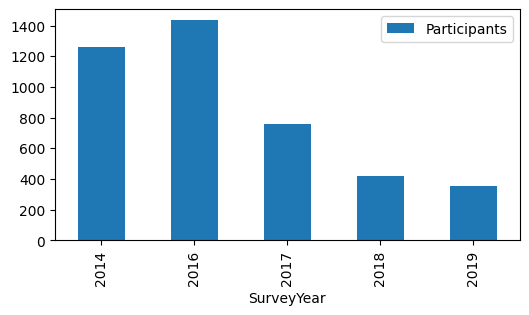

In [21]:
barplot = Count_per_survey.plot.bar(x="SurveyYear", y="Participants", figsize=(6, 3))

In [22]:
query = """
    SELECT AnswerText as Age, count(*) as EmployeesCount
    FROM Answer
    WHERE questionid = 1
    GROUP BY AnswerText 
    ORDER BY length(AnswerText), AnswerText;
"""

Age_count = pd.read_sql(query, con).astype({"Age": int,"EmployeesCount": int})

In [23]:
Age_count = Age_count.sort_values(by = "Age", ascending = True)
Age_count.reset_index(drop=True,inplace=True)
Age_count

,Age,EmployeesCount
0,-29,1
1,-1,5
2,0,1
3,3,1
4,5,1
5,8,1
6,11,1
7,15,1
8,17,1
9,18,9


In [24]:
Age_count.describe()

,Age,EmployeesCount
count,65.000000,65.000000
mean,48.015385,64.892308
std,54.539977,79.612759
min,-29.000000,1.000000
25%,25.000000,3.000000
50%,41.000000,20.000000
75%,57.000000,122.000000
max,329.000000,250.000000


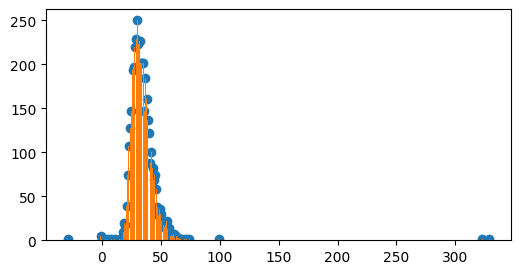

In [25]:
figure, axes = plt.subplots(figsize=(6, 3))

plt.scatter(Age_count["Age"], Age_count["EmployeesCount"])
plt.bar(Age_count["Age"], Age_count["EmployeesCount"])
plt.show()

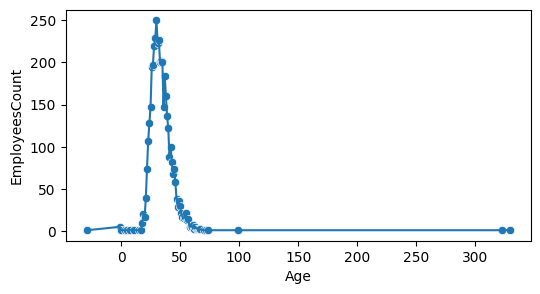

In [26]:
figure, axes = plt.subplots(figsize=(6, 3))

sns.scatterplot(x="Age", y="EmployeesCount", data=Age_count)
sns.lineplot(x="Age", y="EmployeesCount" ,data = Age_count)
plt.show()

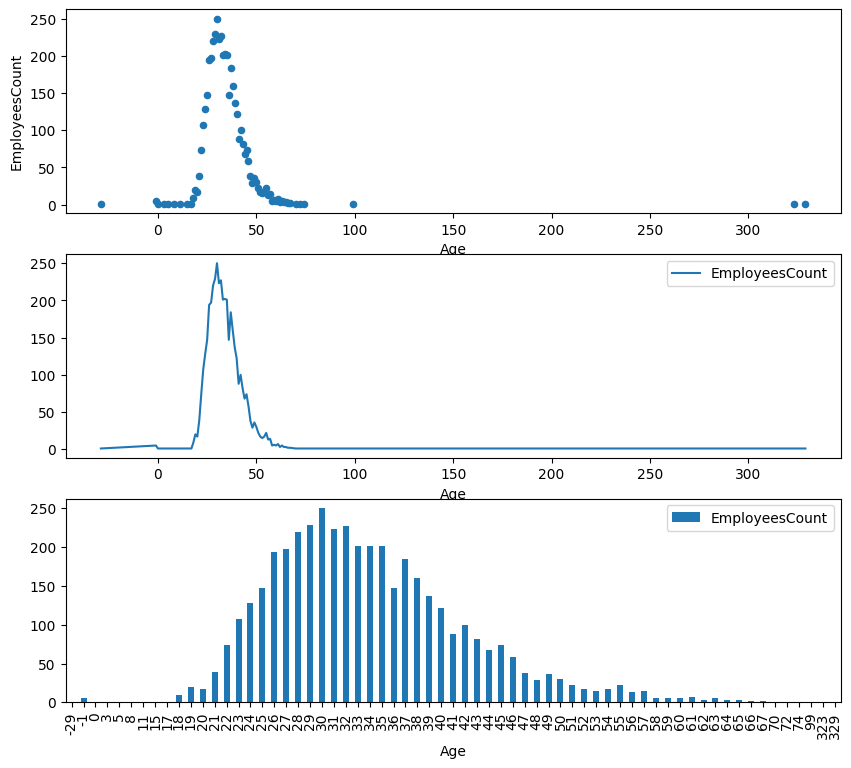

In [27]:
figure, axes = plt.subplots(3, 1, figsize=(10, 9))

Age_count.plot(x="Age", y="EmployeesCount", kind="scatter", ax=axes[0])
Age_count.plot(x="Age", y="EmployeesCount", kind="line", ax=axes[1])
Age_count.plot(x="Age", y="EmployeesCount", kind="bar", ax=axes[2])
plt.show()

In [28]:
query = """
    SELECT SurveyID, CAST(AnswerText AS INT) AS age
    FROM Answer WHERE questionid = 1 AND 
    CAST(AnswerText AS INT) != -1 AND 
    CAST(AnswerText AS INT) BETWEEN 15 AND 74;
"""

df = pd.read_sql(query, con)
df

,SurveyID,age
0,2014,37
1,2014,44
2,2014,32
3,2014,31
4,2014,31
5,2014,33
6,2014,35
7,2014,39
8,2014,42
9,2014,23


In [29]:
query = """
    SELECT SurveyID as SurveyYear, 
    CASE
    	WHEN AnswerText BETWEEN 18 AND 24 THEN '18-24'
    	WHEN AnswerText BETWEEN 25 AND 34 THEN '25-34'
    	WHEN AnswerText BETWEEN 35 AND 44 THEN '35-44'
    	WHEN AnswerText BETWEEN 45 AND 54 THEN '45-54'
    	WHEN AnswerText BETWEEN 55 AND 64 THEN '55-64'
    	WHEN AnswerText BETWEEN 65 AND 99 THEN 'Above 65'
    END AS AgeGroup,
    count(*) AS EmployeesCount
    FROM Answer
    WHERE questionid = 1
    AND AnswerText BETWEEN 18 AND 99
    GROUP BY SurveyID, AgeGroup 
    ORDER BY SurveyID, AgeGroup;
"""

Age_survey = pd.read_sql(query, con).astype({"SurveyYear": str})
Age_survey

,SurveyYear,AgeGroup,EmployeesCount
0,2014,18-24,156
1,2014,25-34,708
2,2014,35-44,321
3,2014,45-54,52
4,2014,55-64,15
5,2014,Above 65,3
6,2016,18-24,123
7,2016,25-34,712
8,2016,35-44,442
9,2016,45-54,118


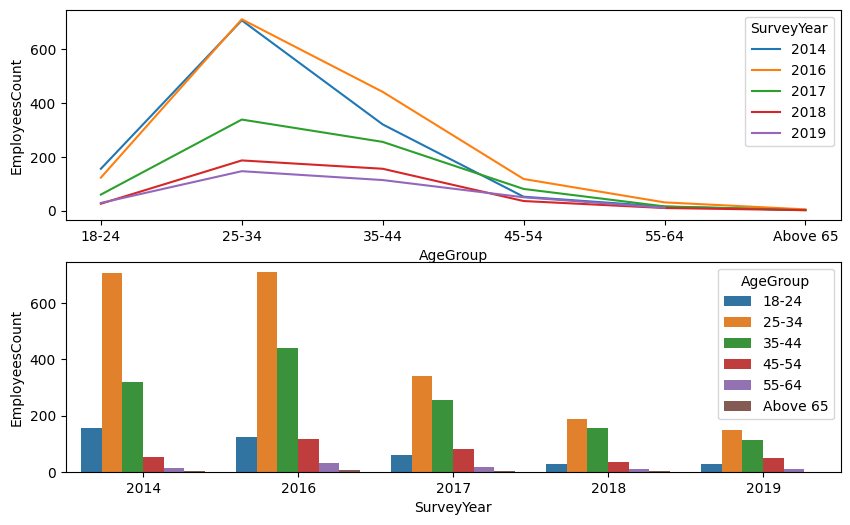

In [30]:
figure, axes = plt.subplots(2, 1, figsize=(10, 6))

sns.lineplot(data=Age_survey, x="AgeGroup", y="EmployeesCount", hue="SurveyYear", ax=axes[0])
sns.barplot(data=Age_survey, x="SurveyYear", y="EmployeesCount", hue="AgeGroup", ax=axes[1])
plt.show()

In [31]:
query = """
    SELECT AnswerText as Gender, count(*) AS EmployeesCount
    FROM Answer 
    WHERE questionid = 2
    GROUP BY AnswerText
    ORDER BY EmployeesCount;
"""

df = pd.read_sql(query,con)
df

,Gender,EmployeesCount
0,43,1
1,A little about you,1
2,AFAB,1
3,Agender trans woman,1
4,Agender/genderfluid,1
5,All,1
6,Androgyne,1
7,Androgynous,1
8,Bigender,1
9,Cishet male,1


In [32]:
query = """
    SELECT SurveyID as SurveyYear,
    	CASE
    		WHEN AnswerText = "male" or AnswerText = "Male" THEN "Male" 
    		WHEN AnswerText = "female" or AnswerText = "Female" THEN "Female" 
            ELSE "Other"
    	END AS Gender,
    count(*) AS EmployeesCount
    FROM Answer 
    WHERE questionid = 2
    AND Gender NOT NULL
    GROUP BY SurveyYear, Gender
    ORDER BY SurveyYear, EmployeesCount;
"""

Gender_survey = pd.read_sql(query,con)
Gender_survey

,SurveyYear,Gender,EmployeesCount
0,2014,Other,22
1,2014,Female,247
2,2014,Male,991
3,2016,Other,40
4,2016,Female,336
5,2016,Male,1057
6,2017,Other,36
7,2017,Female,218
8,2017,Male,502
9,2018,Other,27


In [33]:
Gender_survey.pivot_table(values='EmployeesCount', index = 'SurveyYear', columns= 'Gender', aggfunc= 'sum')

Gender,Female,Male,Other
SurveyYear,,,
2014,247,991,22
2016,336,1057,40
2017,218,502,36
2018,125,265,27
2019,98,227,27


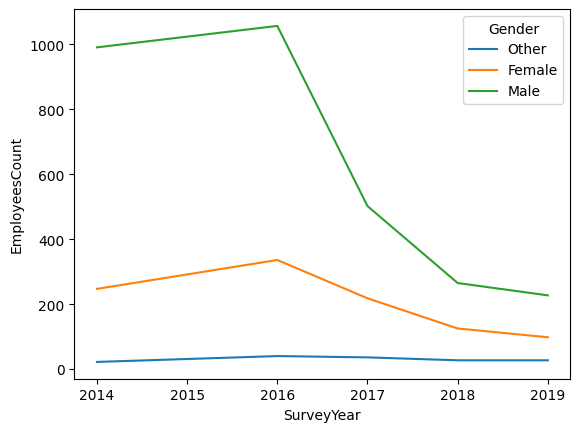

In [34]:
sns.lineplot(data = Gender_survey, x="SurveyYear", y="EmployeesCount", hue="Gender")
plt.show()

In [35]:
query = """
    SELECT SurveyID as SurveyYear, AnswerText AS FamilyHistory, count(*) AS EmployeesCount FROM Answer 
    WHERE questionid = 6
    GROUP BY SurveyID, AnswerText
    ORDER BY SurveyID, AnswerText;
"""
Family_history = pd.read_sql(query, con)
Family_history

,SurveyYear,FamilyHistory,EmployeesCount
0,2014,No,768
1,2014,Yes,492
2,2016,I don't know,275
3,2016,No,488
4,2016,Yes,670
5,2017,I don't know,193
6,2017,No,224
7,2017,Yes,339
8,2018,I don't know,95
9,2018,No,114


In [36]:
Family_history.pivot_table(values='EmployeesCount', index = 'SurveyYear', columns= 'FamilyHistory', aggfunc= 'sum').fillna(0).astype(int)

FamilyHistory,I don't know,No,Yes
SurveyYear,,,
2014,0,768,492
2016,275,488,670
2017,193,224,339
2018,95,114,208
2019,86,107,159


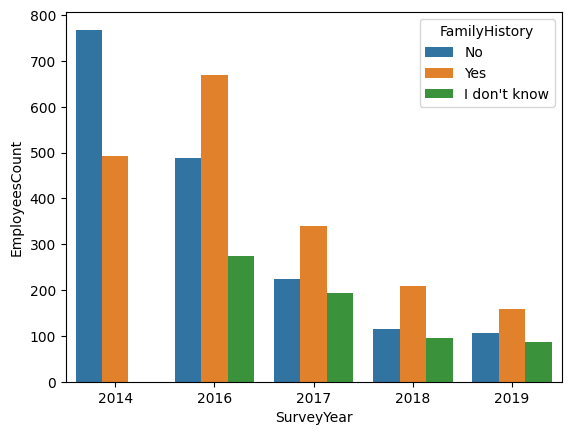

In [37]:
sns.barplot(data = Family_history, x="SurveyYear", y="EmployeesCount", hue = "FamilyHistory")
plt.show()

In [68]:
query = """
    SELECT AnswerText as FamilyHistory, count(*) as Count, 100.0 * count(*)/sum(count(*)) OVER() as Percentage FROM
    (SELECT SurveyID, AnswerText FROM Answer 
    WHERE questionid = 6
    )
    GROUP BY AnswerText;
"""
Family_history_total = pd.read_sql(query, con)
Family_history_total

,FamilyHistory,Count,Percentage
0,I don't know,649,15.386439
1,No,1701,40.327169
2,Yes,1868,44.286392


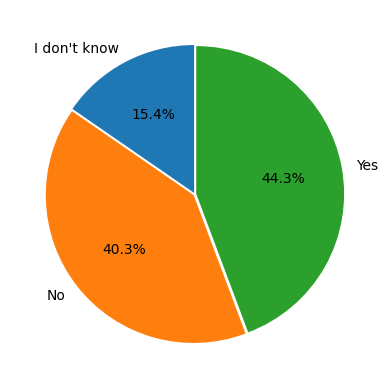

In [39]:
explode = [0.01] * len(Family_history_total)

plt.pie(Family_history_total["Percentage"], explode = explode, labels=Family_history_total["FamilyHistory"], autopct='%1.1f%%', startangle=90)
plt.show()

In [40]:
%whos DataFrame

Variable               Type         Data/Info
---------------------------------------------
Age_count              DataFrame        Age  EmployeesCount\n<...>\n64  329               1
Age_survey             DataFrame       SurveyYear  AgeGroup  <...>    55-64              11
Count_per_survey       DataFrame       SurveyYear  Participan<...>       2019           352
Family_history         DataFrame        SurveyYear FamilyHist<...>      Yes             159
Family_history_total   DataFrame      FamilyHistory  Count  P<...>   Yes   1868   44.286392
Gender_survey          DataFrame        SurveyYear  Gender  E<...>9    Male             227
df                     DataFrame                             <...>     Male            2830
